In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, json
from IPython.display import clear_output

In [2]:
def get_unique_nodes(x):
    return set(list(x.nodeA)+list(x.nodeB))

def count_unique_nodes(x):
    return len(get_unique_nodes(x))

In [3]:
# inpath  = './pulse-silac/20251021-1101-relaxed_carver/20251021-1238-relaxed_carver-signed-distances.csv'
# outpath = './pulse-silac/20251021-1101-relaxed_carver/20251021-1238-relaxed_carver-signed-distances-filtered.csv'

In [4]:
inpath   = './without_sulfo/20251030-1725-compassionate_buck-signed-distances.csv.gz'
outpath1 = './without_sulfo/compassionate_buck-v2/20251030-1725-compassionate_buck-signed-distances-filtered.csv'
outpath2 = './without_sulfo/compassionate_buck-v2/compassionate_buck_ptm_list.csv'

In [5]:
data = pd.read_csv(inpath)
data.tail()

,nodeA,nodeB,distance,Score,pval,adj_pval
11558568,Q8NDC0|6|S|21,P53801|174|Y|21,0.26,0.26,0.0073,0.00999
11558569,Q8NDI1|1058|S|21,Q8NEJ9|143|S|21,0.27,0.27,0.0073,0.00999
11558570,Q8NDI1|335|S|21,Q96K21|463|S|21,0.26,0.26,0.0073,0.00999
11558571,Q8NDI1|335|S|21,Q9H1E3|19|S|21,0.26,0.26,0.0073,0.00999
11558572,Q8NDI1|787|S|21,Q9Y5J1|206|S|21,0.27,0.27,0.0073,0.00999


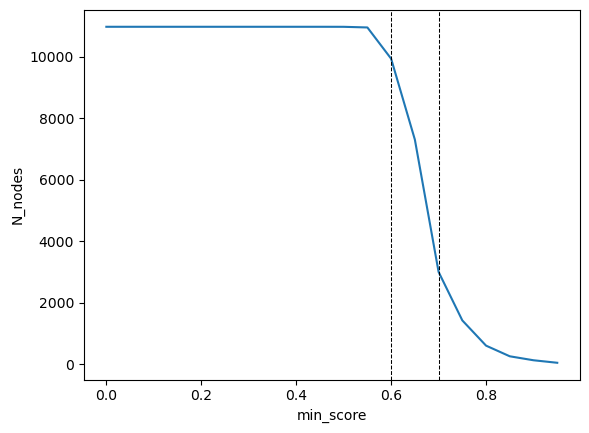

In [6]:
tmp = []
for n in np.arange(0, 1, .05):
    tmp.append((np.round(n,2),
                count_unique_nodes(data[data.Score>=n])))
tmp = pd.DataFrame(tmp, columns=['min_score','N_nodes'])

sns.lineplot(data=tmp, x='min_score', y='N_nodes')
plt.axvline(0.7, color='k', ls='--', lw=.75)
plt.axvline(0.6, color='k', ls='--', lw=.75)

In [7]:
# data[data.Score>=0.65].to_csv(outpath1, index=False)

In [8]:
all_ptms = pd.DataFrame(get_unique_nodes(data), columns=['PTM_ID'])
all_ptms[['UniAcc','POS','RES','MOD']] = all_ptms.PTM_ID.str.split('|', regex=False, expand=True)
# all_ptms.to_csv(outpath2, index=False)
all_ptms

,PTM_ID,UniAcc,POS,RES,MOD
0,Q9UQ35|778|S|21,Q9UQ35,778,S,21
1,P54727|159|T|21,P54727,159,T,21
2,Q9NR56|49|R|7,Q9NR56,49,R,7
3,O75821|42|S|21,O75821,42,S,21
4,Q8N1G2|29|S|21,Q8N1G2,29,S,21
...,...,...,...,...,...
10976,A3KN83|214|S|21,A3KN83,214,S,21
10977,Q9C0D5|214|S|21,Q9C0D5,214,S,21
10978,P78545|215|S|21,P78545,215,S,21
10979,Q8N6N3|158|S|21,Q8N6N3,158,S,21


---------

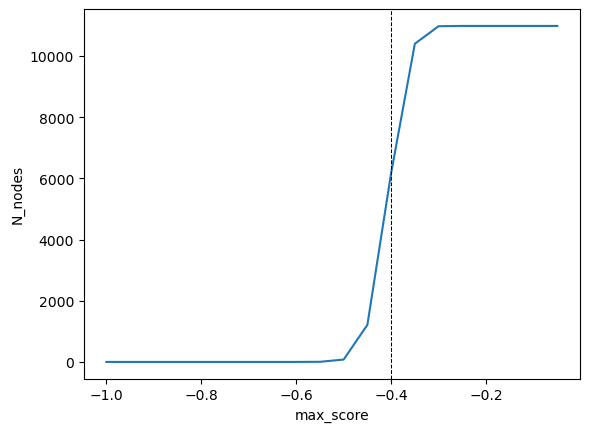

In [14]:
# Negative correlations
tmp = []
for n in np.arange(-1, 0, .05):
    tmp.append((np.round(n,2),
                count_unique_nodes(data[data.Score<=n])))
tmp = pd.DataFrame(tmp, columns=['max_score','N_nodes'])

sns.lineplot(data=tmp, x='max_score', y='N_nodes')
plt.axvline(-0.4, color='k', ls='--', lw=.75)

In [15]:
data[data.Score<=-0.45]

,nodeA,nodeB,distance,Score,pval,adj_pval
10022,O94842|180|T|21,O00410|632|K|34,0.46,-0.46,0.0,0.0
20239,P10636|548|T|21,Q8N257|12|K|1,0.48,-0.48,0.0,0.0
49864,P41162|414|T|21,P60981|121|K|34,0.45,-0.45,0.0,0.0
57471,P49450|21|T|21,P04406|263|K|1,0.46,-0.46,0.0,0.0
57474,P49450|21|T|21,P06748|154|K|1,0.49,-0.49,0.0,0.0
...,...,...,...,...,...,...
6912306,Q8N9U0|174|S|21,E9PAV3|1990|K|34,0.45,-0.45,0.0,0.0
6912341,Q8N9U0|174|S|21,P12814|772|K|34,0.47,-0.47,0.0,0.0
6912356,Q8N9U0|174|S|21,P23284|84|K|34,0.46,-0.46,0.0,0.0
6929888,Q8NCY6|101|S|21,P45880|31|K|34,0.47,-0.47,0.0,0.0


In [16]:
data[data.Score<=-0.45].to_csv('without_sulfo/negative-correlations.csv', index=False)